# Data Pre-Processing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

# post_vacc_inf = pd.read_csv("../data/Post-Vaccination_Infection_Data.csv")

vacc_prog = pd.read_csv("../data/vacc_prog_clean.csv")

In [6]:
# # sum all values in vacc_prog by date
# vacc_prog_by_date = vacc_prog.groupby('administered_date', as_index=False).sum()

# # joining 2 tables into 1 by date
# vaccine_data = pd.merge(post_vacc_inf, vacc_prog_by_date, left_on='date', right_on='administered_date')
# vaccine_data

In [21]:
# Function to find NaN in a given dataset  
def returnNaNCount(dataset):
    output = {} 
    for column in dataset.columns:
        count = dataset[column].isnull().sum()
    if count > 0:
        output[column] = count
    return output 

In [22]:
# Replace nan value with median in post_vacc_inf
def nanReplacer(dataset,meth):
    data = dataset.copy()
    tempDict = returnNaNCount(dataset)
    for key in tempDict:
        if meth == 'median':
            data[key].fillna(data[key].median(),inplace=True)
        if meth == 'mean':
            data[key].fillna(data[key].mean(),inplace=True)
    return data

In [23]:
def scaler(data,range):
    tool = MinMaxScaler(feature_range = range)
    return pd.DataFrame(tool.fit_transform(data))

In [24]:
# Note the two dataframe needs to have same column number counts
def copyColumnName(tobeReplace,target):
    data = tobeReplace.copy()
    index = 0
    for column in target.columns:
        data = tobeReplace.rename({tobeReplace.columns[index]:column},axis=1,inplace=True)
        index += 1
    return data

In [25]:
# Drop column with sepcific names in array
def dropColumnName(tobeDrop,target):
    for column in target:
        if column in tobeDrop.columns.tolist():
            out = tobeDrop.drop([column],axis=1,inplace=True)
        else:
            continue

In [12]:
vacc_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36580 entries, 0 to 36579
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            36580 non-null  int64
 1   administered_date     36580 non-null  int64
 2   total_doses           36580 non-null  int64
 3   pfizer_doses          36580 non-null  int64
 4   moderna_doses         36580 non-null  int64
 5   jj_doses              36580 non-null  int64
 6   partially_vaccinated  36580 non-null  int64
 7   fully_vaccinated      36580 non-null  int64
 8   at_least_one_dose     36580 non-null  int64
 9   california_flag       36580 non-null  int64
 10  booster_recip_count   36580 non-null  int64
dtypes: int64(11)
memory usage: 3.1 MB


In [13]:
column_tobe_droped = [
    'county',
    'cumulative_total_doses',
    'cumulative_pfizer_doses',
    'cumulative_moderna_doses',
    'cumulative_jj_doses',
    'cumulative_at_least_one_dose',
    'cumulative_booster_recip_count',
    'cumulative_fully_vaccinated',
    'total_partially_vaccinated'
]
dropColumnName(vacc_prog,column_tobe_droped)

In [14]:
tempPd = nanReplacer(vacc_prog,meth = 'median')

In [15]:
# post vacc inf encoding process
leEnc = LabelEncoder()
tempPd['administered_date'] = leEnc.fit_transform(tempPd['administered_date'])
tempPd['california_flag'] = leEnc.fit_transform(tempPd['california_flag'])
# tempPd['area_type'] = leEnc.fit_transform(tempPd['area_type'])

In [16]:
#new_tempPd = scaler(tempPd,(0,1)) # rescale

In [18]:
#copyColumnName(pd.DataFrame(new_tempPd),tempPd) # copy column names 

In [25]:
# exported to a new csv 
tempPd.to_csv('../data/vacc_prog_clean.csv',index=0)

# Data Training

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

vacc_prog = pd.read_csv("../data/vacc_prog_clean.csv")

In [39]:
vacc_prog.tail(5)

,administered_date,total_doses,pfizer_doses,moderna_doses,jj_doses,partially_vaccinated,fully_vaccinated,at_least_one_dose,california_flag,booster_recip_count
36575,585,95,49,37,1,23,22,23,0,49
36576,586,97,41,31,2,18,43,18,0,35
36577,587,82,39,35,0,11,26,11,0,45
36578,588,42,19,11,0,11,16,11,0,15
36579,589,11,8,2,0,1,4,1,0,6


In [40]:
# vacc_prog = vacc_prog.drop(vacc_prog.columns[0],axis=1)

In [41]:
from sklearn.model_selection import train_test_split

X = vacc_prog.iloc[:,[0,1,2,3,4,5,6,7,9]].values
y = vacc_prog.iloc[:,8].values

In [42]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=64)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
vacc_clf = DecisionTreeClassifier(criterion="entropy",min_samples_split=4,max_depth=3)
vacc_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4)

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = vacc_clf.predict(X_test)
print("Accuracy: ", vacc_clf.score(X_test, y_test))
print("Confusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy:  0.9596587143803844
Confusion Matrix: 


array([[8822,    0,   31],
       [ 323,    0,    0],
       [ 133,    0, 2763]], dtype=int64)

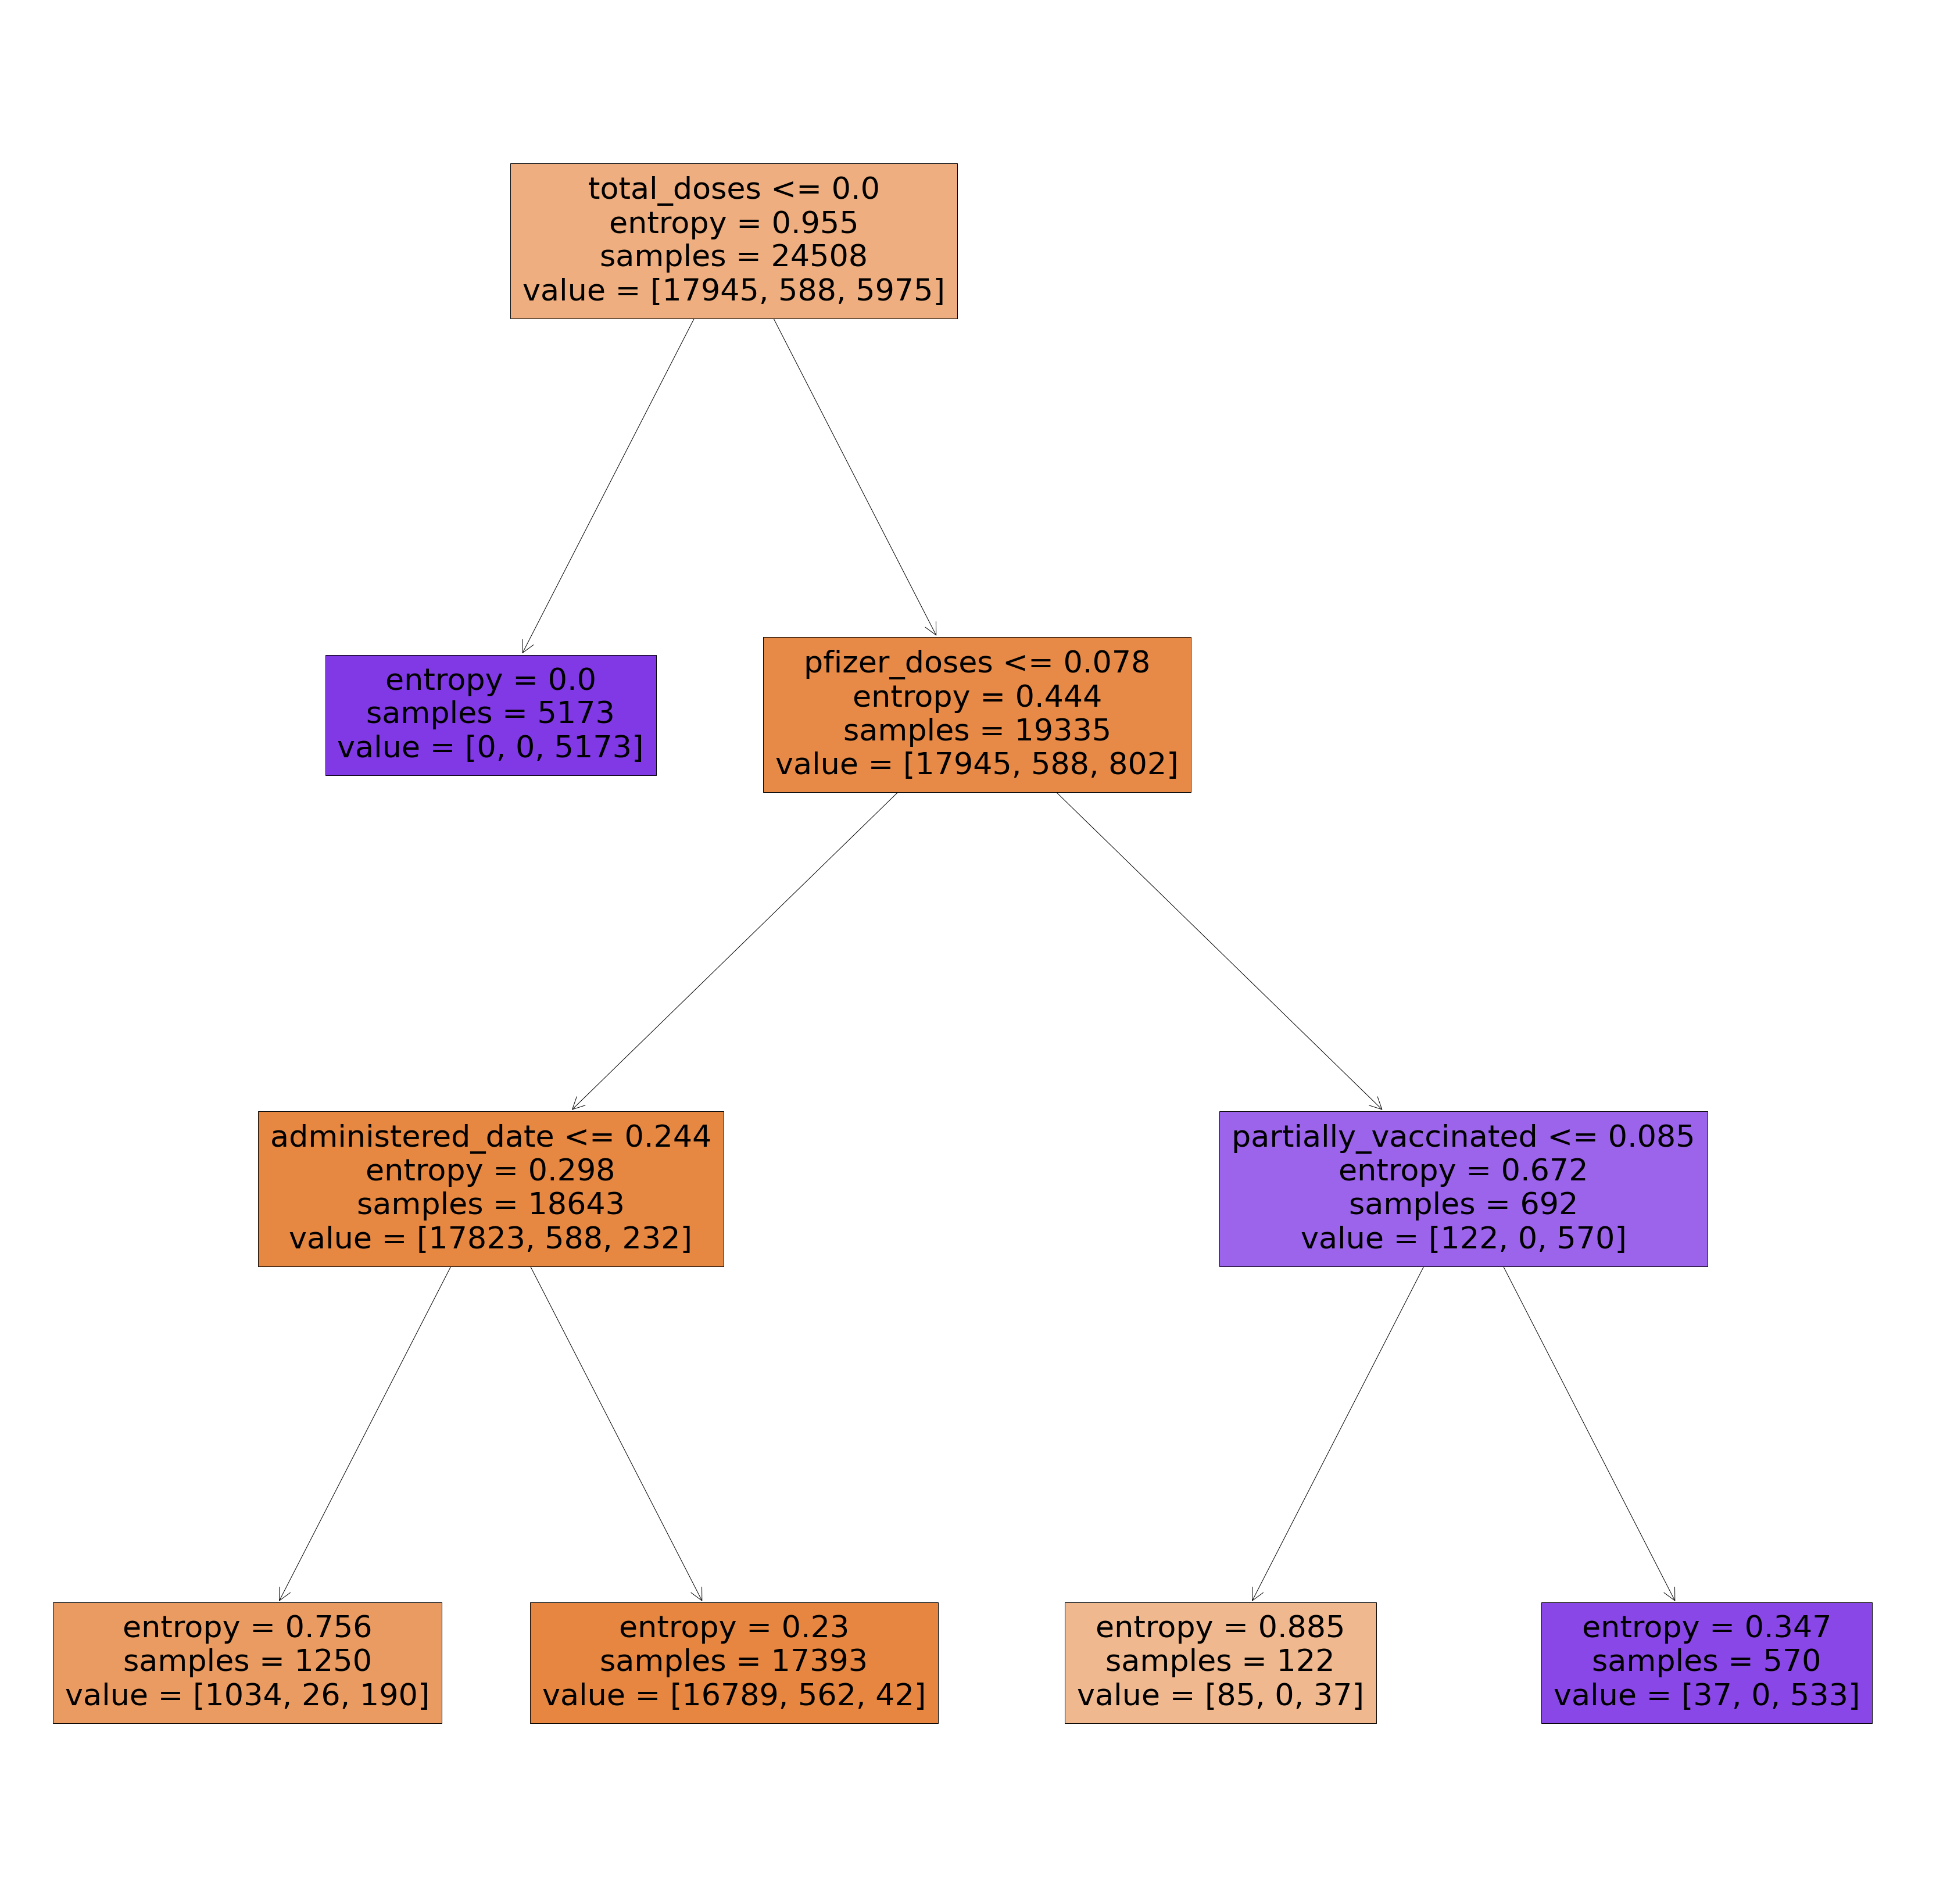

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,60))
fig = tree.plot_tree(vacc_clf, feature_names=vacc_prog.keys(),filled=True)

In [31]:
from sklearn import model_selection
fivefold = model_selection.KFold(n_splits=5)
dt_5fold = DecisionTreeClassifier(criterion="entropy",min_samples_split=4,max_depth=3)
results_5fold = model_selection.cross_val_score(dt_5fold, X_train, y_train, cv=fivefold)

print("Cross-validation results: ", results_5fold)
print("Accuracy: ", (results_5fold.mean()*100.0)) 

Cross-validation results:  [0.9626683  0.96511628 0.95920033 0.9622526  0.96143644]
Accuracy:  96.21347894346411


In [32]:
from sklearn.model_selection import GridSearchCV
max_depth = [3, 4, 5]
min_samples_split = [4, 10, 20]

grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)
clf = GridSearchCV(estimator=dt_5fold, param_grid=grid, cv=5)
best_model = clf.fit(X_train, y_train)

best_score, best_params = best_model.best_score_, best_model.best_params_
print("Best score is: ", best_score)
print("Best parameters are: ", best_params)

Best score is:  0.9677656105786452
Best parameters are:  {'max_depth': 5, 'min_samples_split': 4}


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

In [47]:
rf_clf = RandomForestClassifier(n_estimators=20,criterion='entropy')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [48]:
y_pred = rf_clf.predict(X_test)
print("Accuracy: ", rf_clf.score(X_test, y_test))
print("Confusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy:  0.9807819748177601
Confusion Matrix: 


array([[8796,   38,   19],
       [ 150,  173,    0],
       [  25,    0, 2871]], dtype=int64)

In [36]:
fivefold = model_selection.KFold(n_splits=5)
results_5fold = model_selection.cross_val_score(rf_clf,X_train,y_train,cv=fivefold)

print("Cross-validation results: ", results_5fold)
print("Accuracy: ", (results_5fold*100.0)) 
del rf_clf
del results_5fold

Cross-validation results:  [0.98510812 0.98408813 0.97980416 0.98122832 0.98184044]
Accuracy:  [98.51081191 98.40881273 97.98041616 98.12283208 98.18404407]


# SVM

In [11]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear')
# gram_train = np.dot(X_train,X_train.T)
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
# Predict on training 
# gram_test = np.dot(X_test,X_train.T)
svm_prediction = svm_clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, svm_prediction))
print("Confusion Matrix: ")
confusion_matrix(y_test, svm_prediction)

Accuracy:  0.903247183565275
Confusion Matrix: 


array([[8422,    0,  431],
       [ 315,    0,    8],
       [ 414,    0, 2482]], dtype=int64)

In [16]:
# model evaluation 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score, precision_score

# svm_y_score = svm_clf.predict(X_test)
# precision, recall, thresholds = \
#     precision_recall_curve(y_test, \
#        svm_prediction,pos_label=2)
precision = precision_score(y_test,svm_prediction,average='weighted')
Recall = recall_score(y_test,svm_prediction,average='weighted')

print("Precision: ", precision)
print("Recall: ", Recall)


Precision:  0.878768801812875
Recall:  0.903247183565275


C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Data Visualization - CA FLAG

In [3]:
import matplotlib.pyplot as plt

date = vacc_prog.iloc[:,[0]].values
ca_flag = vacc_prog.iloc[:,[8]].values

In [17]:
len(ca_flag)

36580

{'whiskers': [<matplotlib.lines.Line2D at 0x19cab0bd370>,
 'caps': [<matplotlib.lines.Line2D at 0x19cab0bd910>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cab0bd0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cab0bdeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cab0ca1c0>],
 'means': []}

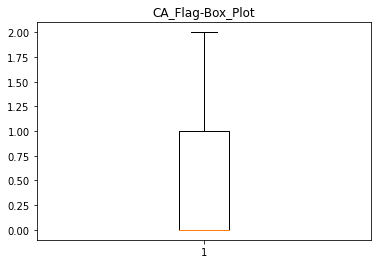

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('CA_Flag-Box_Plot')
ax1.boxplot(ca_flag.flatten())

# ROC curve - Random Forest

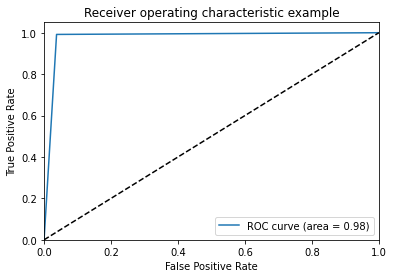

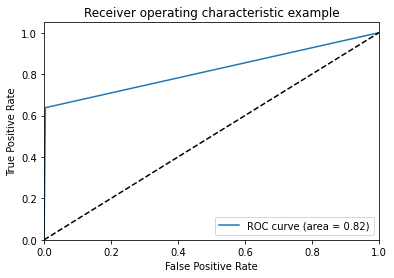

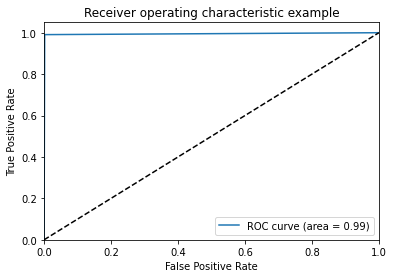

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize

y = label_binarize(y,classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = RandomForestClassifier(n_estimators=20,criterion='entropy')
clf.fit(X_train, y_train)
y_score = clf.predict(X_test) 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Precision Recall Curve - Random Forest

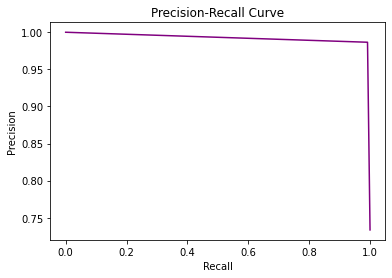

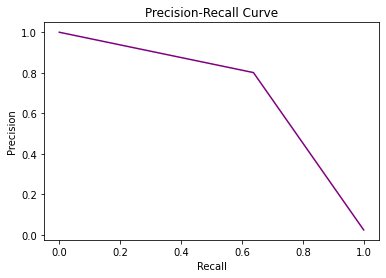

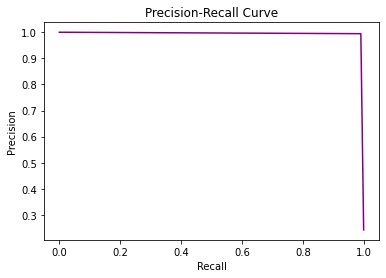

In [67]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
precision = dict()
recall = dict()
thresholds = dict()
for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = \
        precision_recall_curve(y_test[:, i], y_score[:, i])

#create precision recall curve
for i in range(n_classes):
    plt.figure()
    plt.plot(recall[i], precision[i], color='purple')

    #add axis labels to plot
    plt.title('Precision-Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')

    #display plot
    plt.show()

# F1 Score - Random Forest

In [68]:
from sklearn.metrics import f1_score

print("f1_score: ",f1_score(y_test,y_score,average=None))

f1_score:  [0.98913105 0.71017274 0.99264077]


# Feature Selection

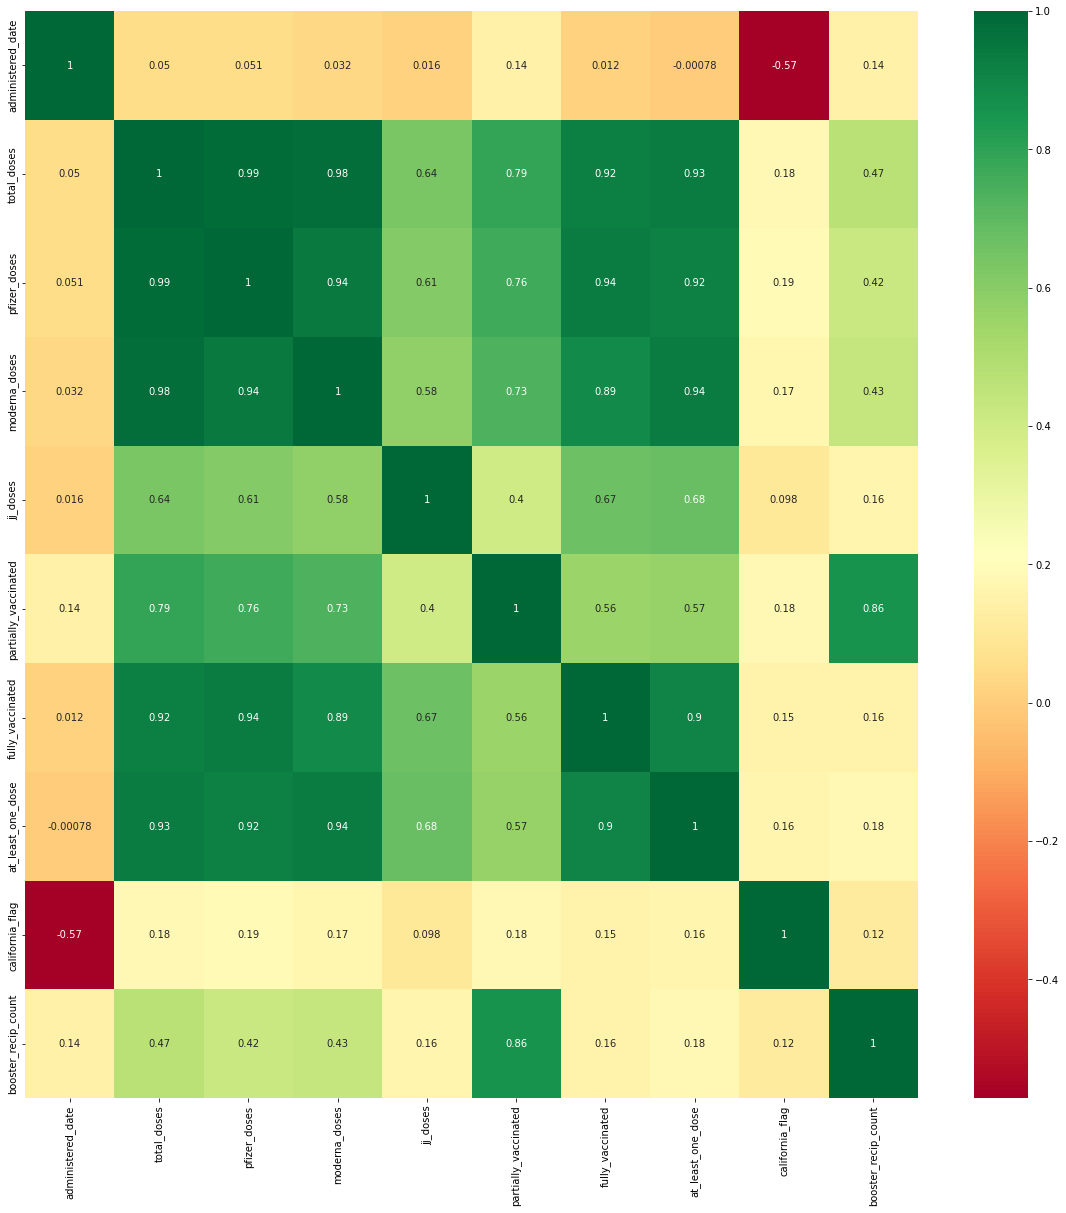

In [72]:
import seaborn as sns
#Using heatmap to visualize correlations
vacc_prog = pd.read_csv("../data/vacc_prog_clean.csv")
X = vacc_prog.iloc[:,[0,1,2,3,4,5,6,7,9]]
y = vacc_prog.iloc[:,8]

corrmat = vacc_prog.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
g = sns.heatmap(vacc_prog[top_corr_features].corr(),annot=True,cmap="RdYlGn")